In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)

In [6]:
# Andrew ACS results: density; Fickian diffusivity; conductivity; t_0+
import numpy as np
def Diff_Andrew_ACS(c_e,c_EC, T):
    M_EMC = 104.105/1e3 # kg/mol
    M_e   = 151.905/1e3 # kg/mol
    c_e_constant = 3800 # mol/m3
    # Get rho using Table S1:
    c_e_used =(
        (c_e <= c_e_constant) * c_e/ 1e3
        +
        (c_e > c_e_constant)  * c_e_constant/ 1e3
    )
    rho = (
        1007.1+114.2*c_e_used 
        - 8.121*np.power(c_e_used,1.5) 
        - 4.013e-5*np.power(c_e_used,10) ) # kg/m3
    # get y using Eq. (S16)
    y = M_EMC*c_e_used / (
        rho + (2*M_EMC-M_e) * c_e_used
    )
    Diff = (4.998-29.96*y+53.78*np.power(y,2) ) / 1e10
    return Diff
def Density_Andrew_ACS(c_e,c_EC, T):
    M_EMC = 104.105/1e3 # kg/mol
    M_e   = 151.905/1e3 # kg/mol
    c_e_constant = 3800 # mol/m3
    # Get rho using Table S1:
    c_e_used =(
        (c_e <= c_e_constant) * c_e / 1e3
        +
        (c_e > c_e_constant)  * c_e_constant / 1e3
    )
    rho = (
        1007.1+114.2*c_e_used 
        - 8.121*np.power(c_e_used,1.5) 
        - 4.013e-5*np.power(c_e_used,10) ) # kg/m3
    return rho
def Cond_Andrew_ACS(c_e,c_EC, T):
    M_EMC = 104.105/1e3 # kg/mol
    M_e   = 151.905/1e3 # kg/mol
    c_e_constant = 3800 # mol/m3
    # Get rho using Table S1:
    c_e_used =(
        (c_e <= c_e_constant) * c_e/ 1e3
        +
        (c_e > c_e_constant)  * c_e_constant/ 1e3
    )
    rho = (
        1007.1+114.2*c_e_used 
        - 8.121*np.power(c_e_used,1.5) 
        - 4.013e-5*np.power(c_e_used,10) ) # kg/m3
    # get y using Eq. (S16)
    y = M_EMC*c_e_used / (
        rho + (2*M_EMC-M_e) * c_e_used
    )
    #print("conductivity",y)
    cond = np.power( (
        48.93*np.power(y,1.5)
        - 284.8* np.power(y,2.5 )
        + 817.7* np.power(y,4 ) ), 2 )
    return cond
def t_0plus_Andrew_ACS(c_e,c_EC, T):
    M_EMC = 104.105/1e3 # kg/mol
    M_e   = 151.905/1e3 # kg/mol
    c_e_constant = 3800 # mol/m3
    # Get rho using Table S1:
    c_e_used =(
        (c_e <= c_e_constant) * c_e/ 1e3
        +
        (c_e > c_e_constant)  * c_e_constant/ 1e3
    )
    rho = (
        1007.1+114.2*c_e_used 
        - 8.121*np.power(c_e_used,1.5) 
        - 4.013e-5*np.power(c_e_used,10) ) # kg/m3
    # get y using Eq. (S16)
    y = M_EMC*c_e_used / (
        rho + (2*M_EMC-M_e) * c_e_used
    )
    # print("trans",y)
    t_0plus = 0.4107 - 1.487*y + 2.547* np.power(y,2)
    return t_0plus


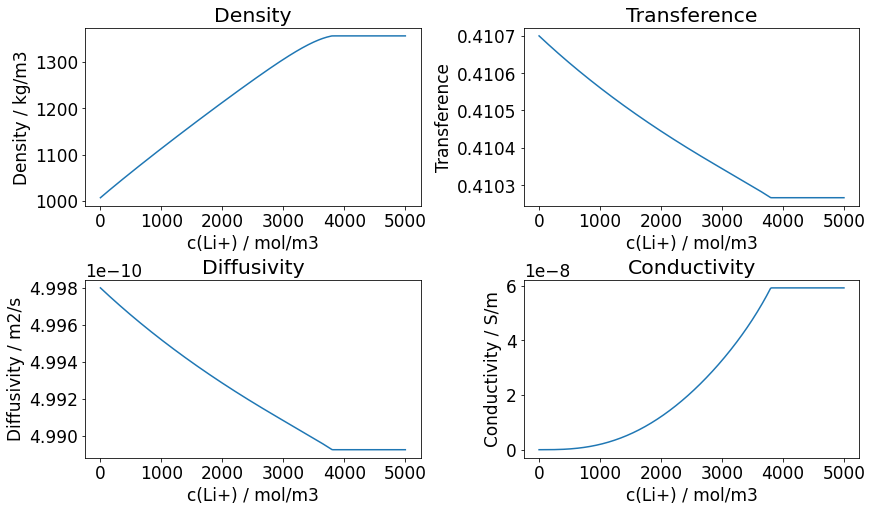

In [7]:

fs=17
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)
C_e = np.linspace(1, 5000, 300).tolist(); c_EC = 6250; T=298.75
Rho = []; Diff = []; T_0plus=[]; Cond = [];
for c_e in C_e:
    Rho.append(Density_Andrew_ACS(c_e,c_EC, T))
    Diff.append(Diff_Andrew_ACS(c_e,c_EC, T))
    T_0plus.append(t_0plus_Andrew_ACS(c_e,c_EC, T))
    Cond.append(Cond_Andrew_ACS(c_e,c_EC, T))

fig, ax = plt.subplots(2,2,figsize=(12, 7), layout='constrained')
ax[0,0].plot(C_e,Rho,label='Coff=100')
ax[0,1].plot(C_e,T_0plus,label='Coff=500')
ax[1,0].plot(C_e,Diff,label='Coff=700')
ax[1,1].plot(C_e,Cond,label='Coff=1000')
ax[0,0].set_ylabel("Density / kg/m3")
ax[0,1].set_ylabel("Transference")
ax[1,0].set_ylabel("Diffusivity / m2/s")
ax[1,1].set_ylabel("Conductivity / S/m")
ax[0,0].set_title("Density")
ax[0,1].set_title("Transference")
ax[1,0].set_title("Diffusivity")
ax[1,1].set_title("Conductivity")

for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("c(Li+) / mol/m3")
    # 